Author: Sabber Ahamed

Objective: The primary goal of this code is to develop a machine learning model that can classify the labels properly and address dataset imbalance. The dataset has three classes (1, 2, and 3). There are three problems in the challenge. In each problem, there is some specific task that needs to be done. In the following subsections, I describe three techniques I used to overcome the data imbalance problem.

Codes and libraries: This project requires Python  3. I have Used python 3.0. The following Python libraries are also required:

<li> NumPy
<li> Pandas
<li> matplotlib
<li> scikit-learn
<li> seaborn

In [606]:
import numpy as np
import pandas as pd
import warnings

## Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [2]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)

## Import datasets

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Exploratory data analysis

In [5]:
train.shape

(38829, 17)

In [6]:
test.shape

(16641, 16)

In [7]:
train.head()

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,label
0,0.874424,0.759918,0.959276,0.821806,0.722757,0.064458,0.399405,0.400940,0.665386,0.749402,0.962733,0.059650,0.392512,0.899956,0.377613,0.157010,1
1,0.169331,0.111202,0.604827,0.175265,0.122169,0.327532,0.023786,0.161728,0.539730,0.487391,0.663999,0.838974,0.258899,0.056143,0.002095,0.000144,1
2,0.329992,0.173176,0.692308,0.353518,0.156055,0.260328,0.091179,0.375606,0.455247,0.500023,0.728747,0.484457,0.633725,0.348351,0.036536,0.004947,1
3,0.176104,0.108428,0.579186,0.215494,0.110754,0.415192,0.015857,0.154121,0.526295,0.434409,0.592285,0.823823,0.280367,0.064162,0.002547,0.000182,1
4,0.971552,0.703186,0.957768,0.818220,0.680667,0.046714,0.329039,0.304118,0.697514,0.660573,0.979338,0.082224,0.459216,0.896192,0.325817,0.118351,1


In [8]:
train.describe()

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,label
count,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,3.882900e+04,3.882900e+04,3.882900e+04,38829.000000
mean,0.452564,0.324257,0.753640,0.425769,0.311064,0.199044,0.163545,0.283753,0.559216,0.540541,0.794910,0.420935,0.508013,4.703503e-01,1.284139e-01,3.757896e-02,1.054186
std,0.243708,0.219627,0.156440,0.208532,0.209755,0.133914,0.129485,0.112639,0.094967,0.078400,0.146847,0.299677,0.206335,3.245707e-01,1.509215e-01,6.229685e-02,0.262132
min,0.015714,0.014286,0.152338,0.014287,0.010255,0.000374,0.002973,0.029058,0.254826,0.273939,0.386060,0.000813,0.000005,9.265071e-09,1.756340e-12,4.764865e-15,1.000000
25%,0.220130,0.123741,0.616893,0.243828,0.119672,0.079274,0.044599,0.212762,0.493038,0.494189,0.679581,0.152327,0.342202,1.132663e-01,5.486555e-03,4.072433e-04,1.000000
50%,0.423327,0.253957,0.779789,0.386694,0.255930,0.177742,0.135778,0.261159,0.541170,0.537088,0.805458,0.333305,0.554853,4.999816e-01,7.025290e-02,1.001907e-02,1.000000
75%,0.654701,0.486845,0.889894,0.601650,0.481184,0.295147,0.256690,0.331268,0.638947,0.576464,0.937122,0.724802,0.665629,7.853695e-01,2.037514e-01,4.835476e-02,1.000000
max,1.000000,0.971634,0.989442,0.950625,1.000000,0.592082,0.764123,1.000000,0.766188,0.823532,0.999997,0.999998,0.947246,1.000000e+00,8.771210e-01,8.727469e-01,3.000000


### Class distribution

In [9]:
label_count = train.groupby('label', as_index = False).count()

In [10]:
class_name = list(label_count['label'])
count = list(label_count['x1'])

In [549]:
count

[37064, 1426, 339]

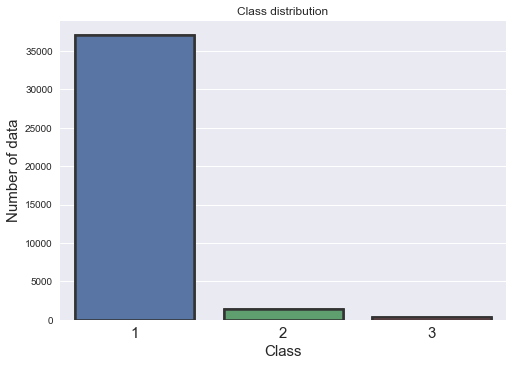

In [75]:
index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

In [12]:
dropped_df = train.dropna(how='all')

In [13]:
dropped_df.describe()

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,label
count,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,38829.000000,3.882900e+04,3.882900e+04,3.882900e+04,38829.000000
mean,0.452564,0.324257,0.753640,0.425769,0.311064,0.199044,0.163545,0.283753,0.559216,0.540541,0.794910,0.420935,0.508013,4.703503e-01,1.284139e-01,3.757896e-02,1.054186
std,0.243708,0.219627,0.156440,0.208532,0.209755,0.133914,0.129485,0.112639,0.094967,0.078400,0.146847,0.299677,0.206335,3.245707e-01,1.509215e-01,6.229685e-02,0.262132
min,0.015714,0.014286,0.152338,0.014287,0.010255,0.000374,0.002973,0.029058,0.254826,0.273939,0.386060,0.000813,0.000005,9.265071e-09,1.756340e-12,4.764865e-15,1.000000
25%,0.220130,0.123741,0.616893,0.243828,0.119672,0.079274,0.044599,0.212762,0.493038,0.494189,0.679581,0.152327,0.342202,1.132663e-01,5.486555e-03,4.072433e-04,1.000000
50%,0.423327,0.253957,0.779789,0.386694,0.255930,0.177742,0.135778,0.261159,0.541170,0.537088,0.805458,0.333305,0.554853,4.999816e-01,7.025290e-02,1.001907e-02,1.000000
75%,0.654701,0.486845,0.889894,0.601650,0.481184,0.295147,0.256690,0.331268,0.638947,0.576464,0.937122,0.724802,0.665629,7.853695e-01,2.037514e-01,4.835476e-02,1.000000
max,1.000000,0.971634,0.989442,0.950625,1.000000,0.592082,0.764123,1.000000,0.766188,0.823532,0.999997,0.999998,0.947246,1.000000e+00,8.771210e-01,8.727469e-01,3.000000


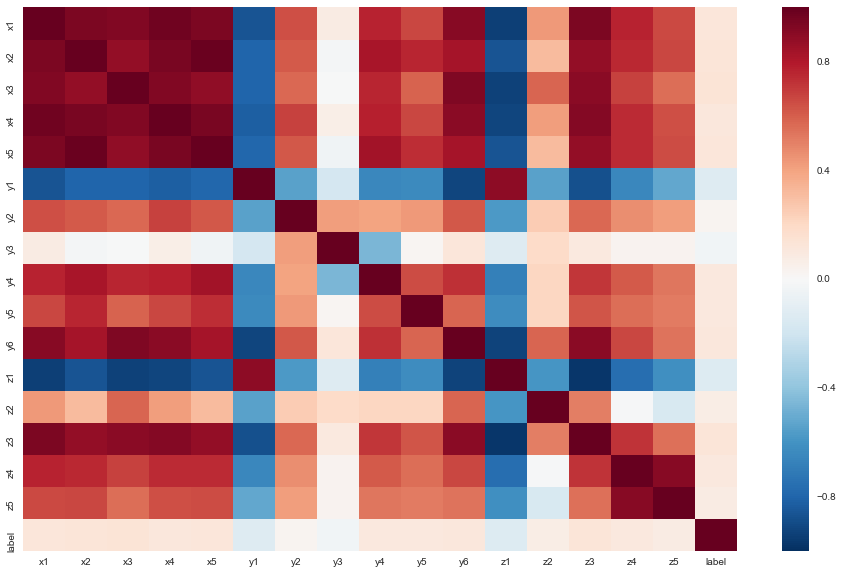

In [14]:
import seaborn as sns
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()

## To handle data imbalance issue, I have used the following three techniques :
### A. Create ensembel class

In [550]:

class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
            
        return train_pred, test_pred, recall_scores, f1_scores

In [464]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

rdf = RandomForestClassifier(random_state = random_state) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300, score=0.9554468194694824, total=  23.2s
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300, score=0.9548088064889919, total=  23.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300, score=0.9555755858872006, total=  23.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_s

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.8min


[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.9555755858872006, total=  27.8s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.9553180530517641, total=  27.7s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.9556929417825863, total=  26.5s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.9548088064889919, total=  36.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.9554468194694824, total=  36.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 14.3min


[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=300, score=0.9549317537986093, total=  24.8s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=300 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=15, n_estimators=500, score=0.9556929417825863, total=  42.5s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=300, score=0.9555755858872006, total=  25.4s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=300, score=0.9550605202163276, total=  25.4s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=400 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=300, score=0.955564142194745, total=  25.9s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=5, n_estimators=400 
[CV]  max_depth=

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 35.1min


[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=300, score=0.9554468194694824, total=  29.7s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=300, score=0.9559505409582689, total=  30.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400, score=0.9548088064889919, total=  40.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400, score=0.9550605202163276, total=  40.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400, score=0.9554468194694824, total=  40.9s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500 
[CV]  max_depth

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 69.1min


[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=400, score=0.9554353426069037, total=  47.7s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500, score=0.9546800566499292, total=  59.2s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500, score=0.9550605202163276, total=  57.9s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500, score=0.9555755858872006, total=  58.2s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=15, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=10, n_estimators=500, score=0.9551892866340458, total=  58.5s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=15, n_estimators=

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 106.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=<mtrand.RandomState object at 0x112987c60>,
        shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x112987c60>,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10, 20], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [4, 8, 12], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [551]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x113c978b8>,
            verbose=0, warm_start=False)
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [555]:
rdf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False,
            random_state=random_state,
            verbose=0, warm_start=False)

In [556]:
base_models = [rdf1]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        

xtrain = train.drop(['label'], axis=1)
ytrain = train['label'].values

In [557]:
train_pred, test_pred, recall_scores, f1_scores = lgb_stack.predict(xtrain, ytrain, test)

Model- 0 and CV- 0 recall: 0.34028137427570854, f1_score: 0.33922009556527327
Model- 0 and CV- 1 recall: 0.34372475097091176, f1_score: 0.3458628316430164
Model- 0 and CV- 2 recall: 0.3475920192638459, f1_score: 0.35352234374773833
Model- 0 and CV- 3 recall: 0.34035087719298246, f1_score: 0.33952025951020165
Model- 0 and CV- 4 recall: 0.34385964912280703, f1_score: 0.34606151198079443


In [558]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.3448836391344175

2. The recall score of the model 0.343163299137863

3. Classification report 
              precision    recall  f1-score   support

          1       0.96      1.00      0.98     37064
          2       0.76      0.03      0.05      1426
          3       0.20      0.00      0.01       339

avg / total       0.94      0.96      0.93     38829
 

4. Confusion matrix 
 [[37060     4     0]
 [ 1384    38     4]
 [  330     8     1]] 



In [573]:
tpred = pd.DataFrame(test_pred)
final_tpred = tpred.mode(axis=1)

In [576]:
np.unique(final_tpred)

array([ 1.,  2.,  3.])

In [603]:
final_tpred.to_csv('predicted_labels_1.csv', index=False, header= False)

The datasets used in problem-1 are highly unbalance. Therefore, all the evaluation metrics shows the expected random performance. Due to the unbalance data, the probabilities for minor classes (class-2 and 3) are inaccurate. But we can still get good predictions by choosing a more appropriate probability cutoff. In the problem-3 section, I will imporve the model performance by choosing a cutoff by ovserving the minor class probability distribution and ROC curve and by setting unequal importance of the class.

### Modified Ensemble

In this problem the labels have unequal importance, in the sense that we want to penalize the model most if it misclassified label 3, a little less for 2 and the least for label 1. Additionally, in case of a misclassification, it is preferable to over-predict a label than under-predict (i.e. misclassifying label 3 as 2 is worse than misclassifying label 2 as 3). To implement the above constraints I would rebuild problem-1 model in following steps:

<li> <b>Step 1: </b>Predict probabilities instead of actual prediction.
<li> <b>Step 2: </b>Set the class weight.
<li> <b>Step 3: </b>Get probability distribution of minor class.
<li> <b>Step 4: </b>From the ROC curve and probability distribution obtain probability thresholds for classes.
<li> <b>Step 5: </b>Finally use the threshold to over-predict a label than under-predict.

In [579]:

class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                ## Probabilities
                valid_proba = clf.predict_proba(X_valid)
                train_proba[valid_idx, :] = valid_proba
                test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            test_proba /= self.n_splits
            
        return train_proba, test_proba, train_pred, test_pred

### B. Set class weight

In [580]:
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({1:1.9, 2:35, 3:180})

rdf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False,
            random_state=random_state,
            verbose=0, warm_start=False)

In [581]:
base_models = [rdf]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        

xtrain = train.drop(['label'], axis=1)
ytrain = train['label'].values
# ytrain = label_binarize(Y, classes=[0, 1, 2])

In [582]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, test)

Model- 0 and CV- 0 recall: 0.5750114509904545, f1_score: 0.3881526328257434
Model- 0 and CV- 1 recall: 0.5889211725642496, f1_score: 0.38437185414981717
Model- 0 and CV- 2 recall: 0.5623819310538191, f1_score: 0.3893834041357433
Model- 0 and CV- 3 recall: 0.5834766817616167, f1_score: 0.38175751254315576
Model- 0 and CV- 4 recall: 0.5679677139058309, f1_score: 0.3888236572862818


In [583]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.3864621253731387

2. The recall score of the model 0.5756000234914537

3. Classification report 
              precision    recall  f1-score   support

          1       0.98      0.79      0.88     37064
          2       0.12      0.49      0.19      1426
          3       0.05      0.44      0.09       339

avg / total       0.94      0.78      0.85     38829
 

4. Confusion matrix 
 [[29434  4980  2650]
 [  399   699   328]
 [   90    99   150]] 



### Probability distribution for all classes

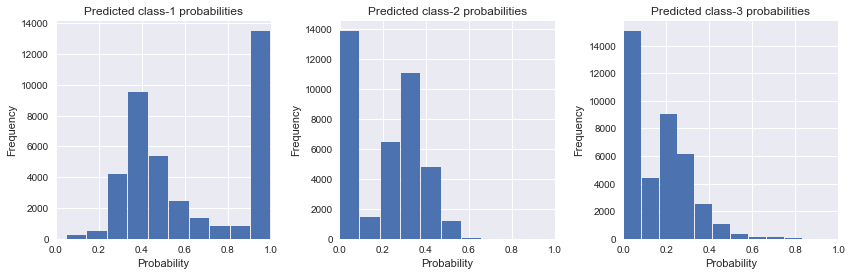

In [584]:
# histogram of predicted probabilities
plt.figure(figsize=(12, 4))
nclasses = 3
for i in range(nclasses):
    
    plt.subplot(1, 3, i+1)
    plt.hist(train_proba[:, i], bins=10, histtype='bar', rwidth=0.95)
    plt.xlim(0,1)
    plt.title('Predicted class-{} probabilities'.format(i+1))
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### C. Over-Predict a Label than Under-Predict:

In [585]:
def re_predict(data, threshods):

    argmax = np.argmax(data)

    ## If the argmax is 2 (class-3) then ovbiously return this highest label
    if argmax == 2: 
        return (argmax +1)

    # If argmax is 1 (class-2) there is a chnace that, label is class-2 if
    # the probability of the class is greater than the threshold otherwise obviously
    # return this highest label (class-3)
    elif argmax == 1:
        if data[argmax] >= threshods[argmax] : 
            return (argmax +1)
        else:
            return (argmax +2)

    # If the argmax is 0 (class-1) then there are chances that label is class-1 if
    # the probability of the class is greater than the threshold otherwise label can be
    # either next two highest labels (class-2 or class-3). To determine the exact class
    # class, we have to consider four cases.
    # case A : if class_2_prob >= threshold and class_3_prob < threshold then pick class-2
    # case B : if class_3_prob >= threshold and class_2_prob < threshold then pick class-3
    # case C : if class_2_prob < threshold and class_3_prob < threshold then pick class-1
    # case D : if class_2_prob > threshold and class_3_prob > threshold then pick class-3

    elif argmax == 0:

        if data[argmax] >= threshods[argmax] : 
            return (argmax +1)
        else:
            # case A : if class_2_prob >= threshold and class_3_prob < threshold then pick class-2
            if data[argmax + 1] >= threshods[argmax + 1] and data[argmax + 2] < threshods[argmax + 2]:
                return (argmax + 2)

            # case B : if class_3_prob >= threshold and class_2_prob < threshold then pick class-3
            if data[argmax + 2] >= threshods[argmax + 2] and data[argmax + 1] < threshods[argmax + 1]:
                return (argmax + 3)

            # case C : if class_2_prob < threshold and class_3_prob < threshold then pick class-1
            if data[argmax + 1] < threshods[argmax + 1] and data[argmax + 2] < threshods[argmax + 2]:
                return (argmax + 1)

            # case D : if class_2_prob > threshold and class_3_prob > threshold then pick class-3
            if data[argmax + 1] > threshods[argmax + 1] and data[argmax + 2] > threshods[argmax + 2]:
                return (argmax + 3)

    

### Finding threshold probability of classes

In [586]:
y = label_binarize(ytrain, classes=[1, 2, 3])
_, _, th1 = roc_curve(y[:, 0], train_proba[:, 0])
_, _, th2 = roc_curve(y[:, 1], train_proba[:, 1])
_, _, th3 = roc_curve(y[:, 2], train_proba[:, 2])

In [587]:
print(np.median(th1))
print(np.median(th2))
print(np.median(th3))

0.41782919929
0.300981056675
0.202450504927


In [588]:
threshold = [0.47, 0.30, 0.15]
new_pred = []
for i in range(train_pred.shape[0]):
    new_pred.append(re_predict(train_proba[i, :], threshold))

In [589]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, new_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, new_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, new_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, new_pred)))

1. The F-1 score of the model 0.3187033756136204

2. The recall score of the model 0.5635569577437387

3. Classification report 
              precision    recall  f1-score   support

          1       0.99      0.57      0.73     37064
          2       0.12      0.50      0.19      1426
          3       0.02      0.62      0.04       339

avg / total       0.95      0.57      0.70     38829
 

4. Confusion matrix 
 [[21249  5094 10721]
 [  114   710   602]
 [   29   100   210]] 



In [591]:
test_proba.shape

(16641, 3)

In [600]:
final_tpred_prob3 = []
for i in range(test_proba.shape[0]):
    final_tpred_prob3.append(re_predict(test_proba[i, :], threshold))

In [601]:
tpred_prob3 = pd.DataFrame(final_tpred_prob3)
tpred_prob3.to_csv('final.csv', index=False, header=False)